## Project - Term Deposit Sale

### Import the necessary packages


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from os import system
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [2]:
data = pd.read_csv('bank-full.csv')
print('Number of rows %d and number of columns %d' % data.shape)

Number of rows 45211 and number of columns 17


In [3]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
print(data.describe().transpose())

            count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  


### There are some balances that are negative converting the negative balance to positive values

In [6]:
data['balance'] = data['balance'].abs()

### Number of unique in each column

In [7]:
print(data.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      6258
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


### Check for null values

In [8]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [9]:
data['education'] = data['education'].astype('category')
data['marital'] = data['marital'].astype('category')
data['job'] = data['job'].astype('category')
data['contact'] = data['contact'].astype('category')


In [10]:
replace_struct = {"job":{"blue-collar":1,"management":2,"technician":3,"admin.":4,"services":5,"retired":6,"self-employed":7,"entrepreneur":8,"unemployed":0,"housemaid":9,"student":10,"unknown":12},"poutcome":{"success":2,"failure":-1,"other":1,"unknown":0},"education":{"unknown":0,"primary":1,"secondary":2,"tertiary":3},"marital":{"divorced":0,"single":1,"married":2},"housing":{"no":0,"yes":1},"default":{"no":0,"yes":1},"loan":{"no":0,"yes":1},"contact":{"unknown":0,"cellular":1,"telephone":2},"Target":{"no":0,"yes":1}}

In [11]:
one_hot_cols=["poutcome","housing","default","loan","job","marital","education"]
replaced_data=data.replace(replace_struct)

### Value counts

In [12]:
print(data.poutcome.value_counts())
print(data.housing.value_counts())
print(data.default.value_counts())
print(data.housing.value_counts())
print(data.loan.value_counts())
print(data.Target.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
no     39922
yes     5289
Name: Target, dtype: int64


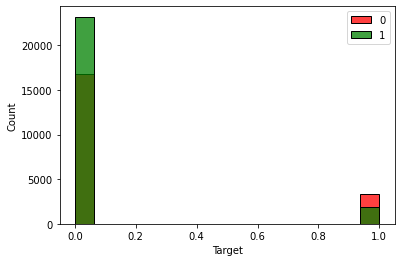

In [13]:
sns.histplot(replaced_data[replaced_data['housing']==0]['Target'],color='r',label=0)
sns.histplot(replaced_data[replaced_data['housing']==1]['Target'],color='g',label=1)
plt.legend()
plt.show()

Few of the clients with housing loans also took Term deposit

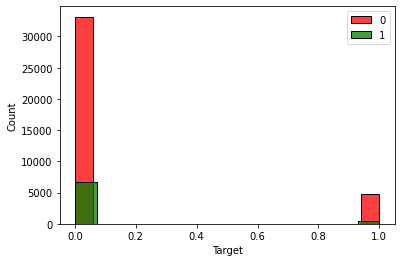

In [14]:
sns.histplot(replaced_data[replaced_data['loan']==0]['Target'],color='r',label=0)
sns.histplot(replaced_data[replaced_data['loan']==1]['Target'],color='g',label=1)
plt.legend()
plt.show()


Majority of the clients who took term deposit did not have personal loans. 

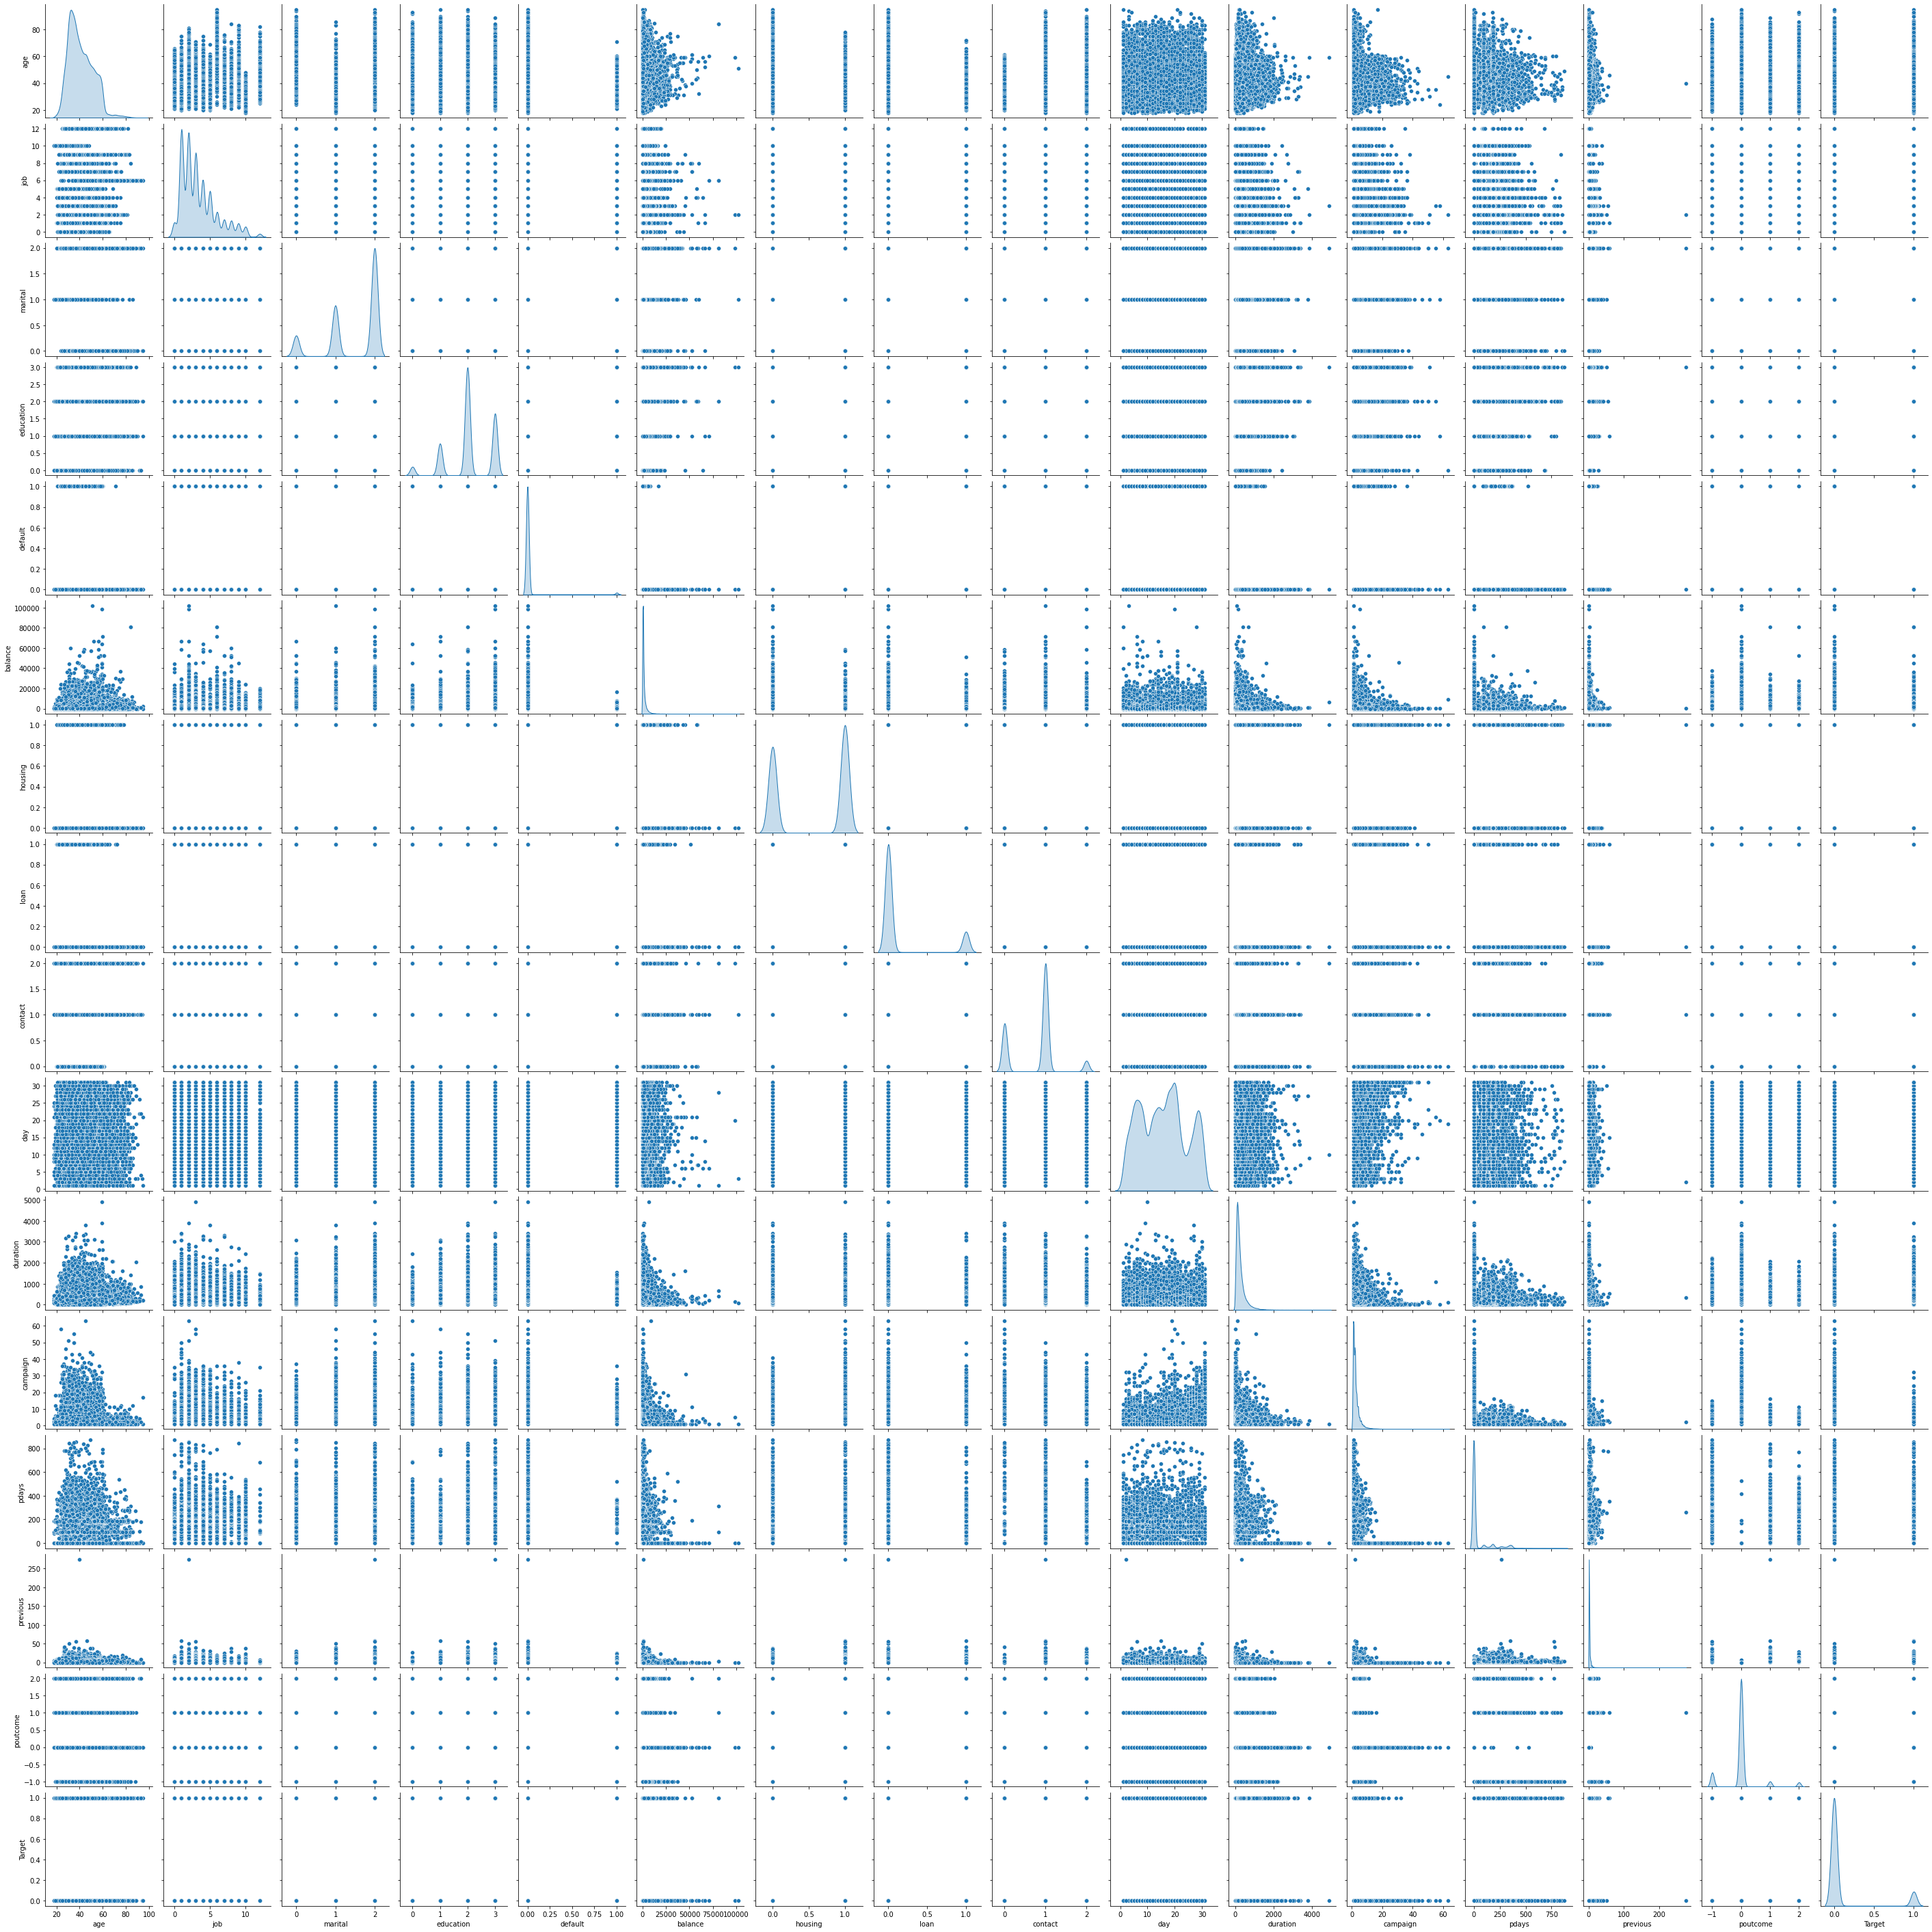

In [15]:
sns.pairplot(replaced_data,diag_kind='kde')
plt.show()

The data is skewed and there fore need some normalization.

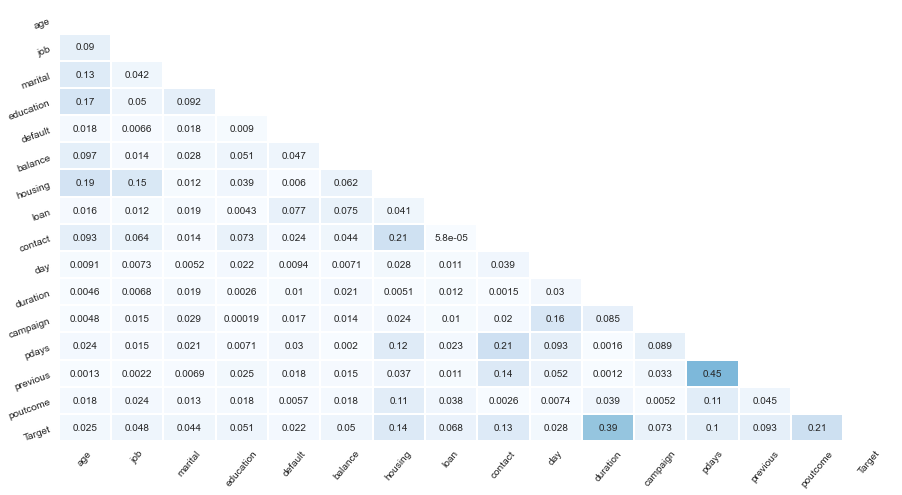

In [16]:
corr = abs(replaced_data.corr())
lower_triangle = np.tril(corr, k = -1)
mask = lower_triangle == 0

plt.figure(figsize = (15,8))
sns.set_style(style = 'white')  
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True,
            xticklabels = corr.index, yticklabels = corr.columns, cbar= False, linewidths= 1, mask = mask)
plt.xticks(rotation = 50)   
plt.yticks(rotation = 20)
plt.show()

Previous and pdays have a high co-relation and hence pdays can be dropped.

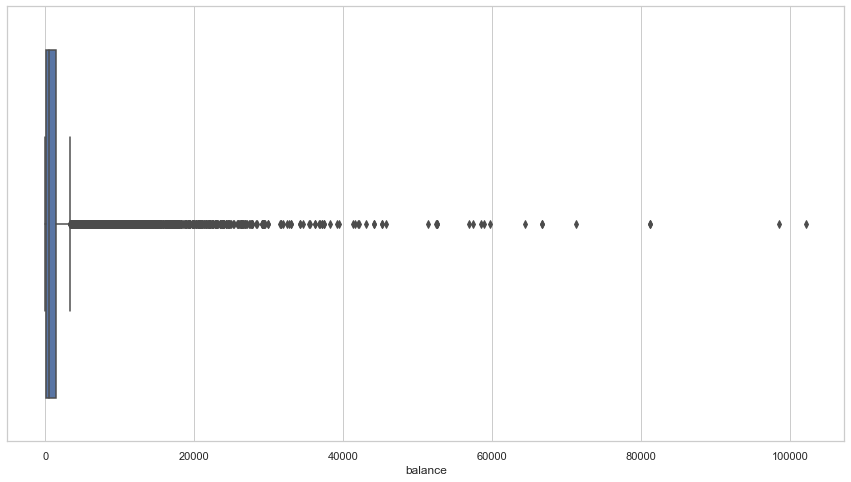

In [17]:
plt.figure(figsize = (15,8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=replaced_data["balance"])

Balance is highly skewed and there for need to be normalized. 

### Normalizing the data columns

In [18]:
replaced_data["balance"] = replaced_data["balance"] / replaced_data["balance"].max()
replaced_data["age"] = replaced_data["age"] / replaced_data["age"].max()
replaced_data["duration"] = replaced_data["duration"] / replaced_data["duration"].max()

In [19]:
replaced_data.drop(['day','month'],axis=1,inplace=True)
replaced_data=pd.get_dummies(replaced_data, columns=one_hot_cols)

### Preparing data for building models

In [20]:
Y = replaced_data['Target']
X = replaced_data.drop(columns=['Target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [21]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [22]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(replaced_data.loc[replaced_data['Target'] == 1]), (len(replaced_data.loc[replaced_data['Target'] == 1])/len(replaced_data.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(replaced_data.loc[replaced_data['Target'] == 0]), (len(replaced_data.loc[replaced_data['Target'] == 0])/len(replaced_data.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39922 (88.30%)

Training Target True Values    : 3738 (11.81%)
Training Target False Values   : 27909 (88.19%)

Test Target True Values        : 1551 (11.43%)
Test Target False Values       : 12013 (88.57%)



## Logistic Regression

In [23]:
model_performance = {'Model': [],'Accuracy': [],'F1_score': [],'Precision': [],'AUC':[]}

In [24]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print('Model score is %.2f' % model.score(x_train, y_train))
print('Model score is %.2f' % model.score(x_test, y_test))

Model score is 0.90
Model score is 0.90


<AxesSubplot:>

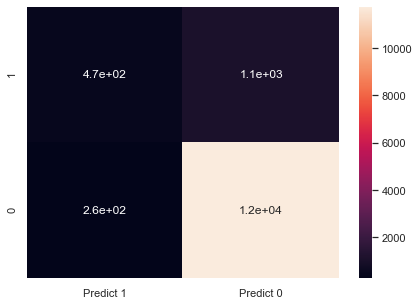

In [25]:
cm = confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


In [26]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('F1 score is %.2f' % f1_score(y_test, y_predict))
print('AUC %.2f' % roc_auc_score(y_test, y_predict))
print('Precision is %.2f' % precision_score(y_test, y_predict))

model_performance['Model'].append('LogisticRegression')
model_performance['F1_score'].append('%.2f' % f1_score(y_test, y_predict))
model_performance['Accuracy'].append('%.2f' % accuracy_score(y_test, y_predict))
model_performance['AUC'].append('%.2f' % roc_auc_score(y_test, y_predict))
model_performance['Precision'].append('%.2f' % precision_score(y_test, y_predict))


Accuracy score is 0.90
F1 score is 0.41
AUC 0.64
Precision is 0.64


### Ensemble models

### Decision Tree

In [27]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
decision_tree.fit(x_train, y_train)
y_predict = decision_tree.predict(x_test)

print(decision_tree.score(x_train, y_train))
print(decision_tree.score(x_test, y_test))

0.9007804847220906
0.9023149513417871


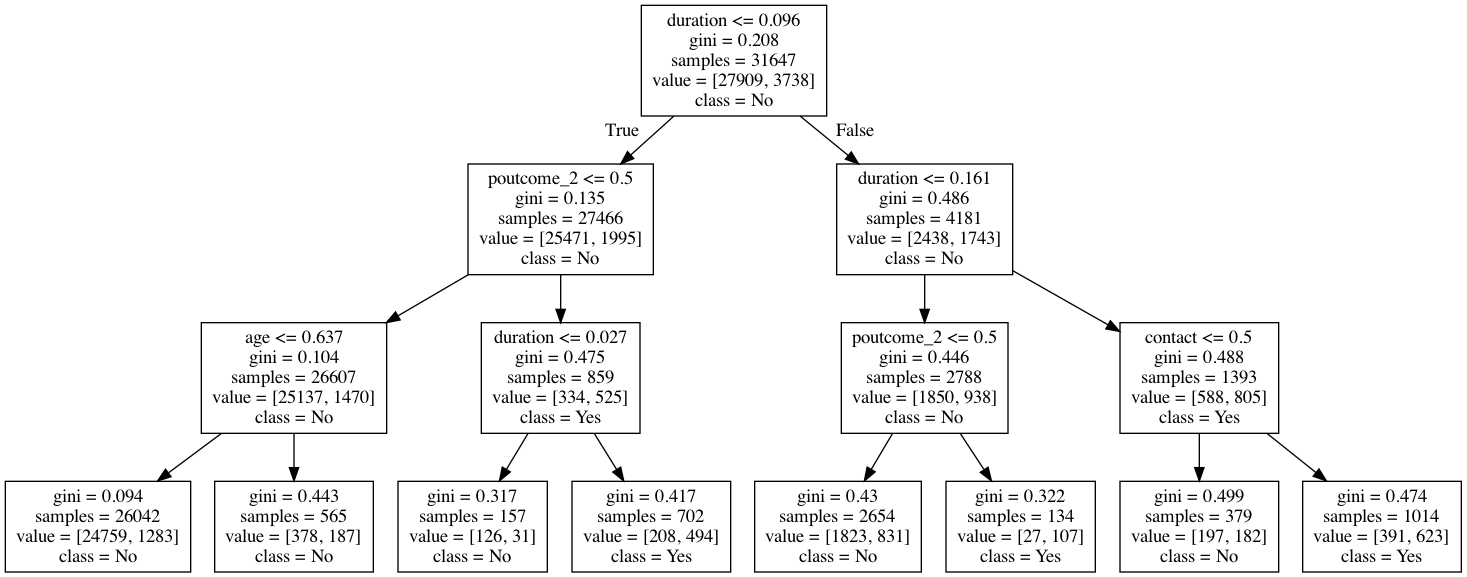

In [28]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(decision_tree, out_file=Credit_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Credit_Tree_File.close()

ret_code = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if ret_code>0:
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))


In [29]:
# print(pd.DataFrame(decision_tree.feature_importances_, columns = ["Imp"], index = x_train.columns))

<AxesSubplot:>

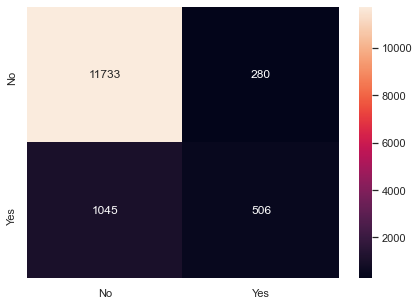

In [30]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [31]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('F1 score is %.2f' % f1_score(y_test, y_predict))
print('AUC %.2f' % roc_auc_score(y_test, y_predict))
print('Precision is %.2f' % precision_score(y_test, y_predict))

model_performance['Model'].append('DecisionTreeClassifier')
model_performance['F1_score'].append('%.2f' % f1_score(y_test, y_predict))
model_performance['Accuracy'].append('%.2f' % accuracy_score(y_test, y_predict))
model_performance['AUC'].append('%.2f' % roc_auc_score(y_test, y_predict))
model_performance['Precision'].append('%.2f' % precision_score(y_test, y_predict))


Accuracy score is 0.90
F1 score is 0.43
AUC 0.65
Precision is 0.64


### Bagging

In [32]:
bgcl = BaggingClassifier(base_estimator=decision_tree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(x_train, y_train)
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_train , y_train))
print(bgcl.score(x_test , y_test))

0.9009700761525579
0.9025361250368623


<AxesSubplot:>

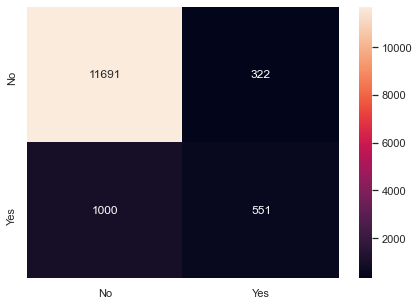

In [33]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [34]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('F1 score is %.2f' % f1_score(y_test, y_predict))
print('AUC %.2f' % roc_auc_score(y_test, y_predict))
print('Precision is %.2f' % precision_score(y_test, y_predict))

model_performance['Model'].append('BaggingClassifier')
model_performance['F1_score'].append('%.2f' % f1_score(y_test, y_predict))
model_performance['Accuracy'].append('%.2f' % accuracy_score(y_test, y_predict))
model_performance['AUC'].append('%.2f' % roc_auc_score(y_test, y_predict))
model_performance['Precision'].append('%.2f' % precision_score(y_test, y_predict))


Accuracy score is 0.90
F1 score is 0.45
AUC 0.66
Precision is 0.63


### Boosting

In [35]:
abcl = AdaBoostClassifier(n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)

print(abcl.score(x_train , y_train))
print(abcl.score(x_test , y_test))

0.9004013018611559
0.8996608670008847


0.8996608670008847


<AxesSubplot:>

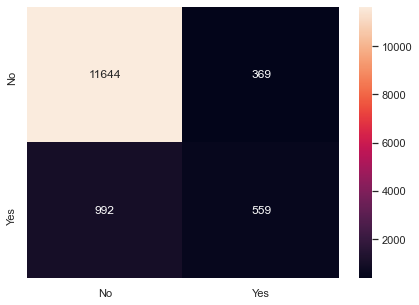

In [36]:
print(abcl.score(x_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [37]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('F1 score is %.2f' % f1_score(y_test, y_predict))
print('AUC %.2f' % roc_auc_score(y_test, y_predict))
print('Precision is %.2f' % precision_score(y_test, y_predict))

model_performance['Model'].append('AdaBoostClassifier')
model_performance['F1_score'].append('%.2f' % f1_score(y_test, y_predict))
model_performance['Accuracy'].append('%.2f' % accuracy_score(y_test, y_predict))
model_performance['AUC'].append('%.2f' % roc_auc_score(y_test, y_predict))
model_performance['Precision'].append('%.2f' % precision_score(y_test, y_predict))


Accuracy score is 0.90
F1 score is 0.45
AUC 0.66
Precision is 0.60


### Random Forest

In [38]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(x_train, y_train)

y_predict = rfcl.predict(x_test)
print(rfcl.score(x_train , y_train))
print(rfcl.score(x_test , y_test))


0.9995892185673207
0.9001769389560602


<AxesSubplot:>

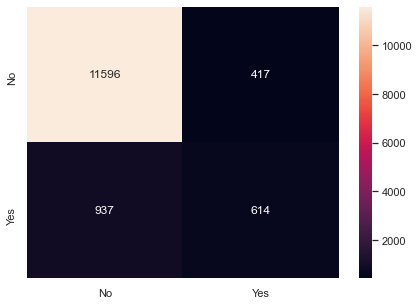

In [39]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [40]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('F1 score is %.2f' % f1_score(y_test, y_predict))
print('AUC %.2f' % roc_auc_score(y_test, y_predict))
print('Precision is %.2f' % precision_score(y_test, y_predict))

model_performance['Model'].append('RandomForestClassifier')
model_performance['F1_score'].append('%.2f' % f1_score(y_test, y_predict))
model_performance['Accuracy'].append('%.2f' % accuracy_score(y_test, y_predict))
model_performance['AUC'].append('%.2f' % roc_auc_score(y_test, y_predict))
model_performance['Precision'].append('%.2f' % precision_score(y_test, y_predict))


Accuracy score is 0.90
F1 score is 0.48
AUC 0.68
Precision is 0.60


### Gradient Boost

In [41]:

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)

print(gbcl.score(x_train , y_train))
print(gbcl.score(x_test , y_test))

0.9055202704837741
0.9034945443821881


<AxesSubplot:>

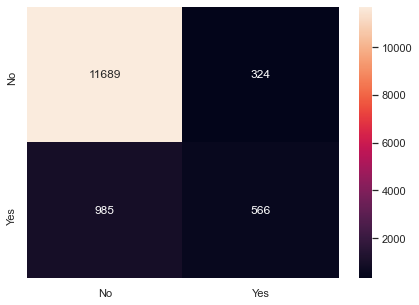

In [42]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [43]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))
print('F1 score is %.2f' % f1_score(y_test, y_predict))
print('AUC %.2f' % roc_auc_score(y_test, y_predict))
print('Precision is %.2f' % precision_score(y_test, y_predict))

model_performance['Model'].append('GradientBoostingClassifier')
model_performance['F1_score'].append('%.2f' % f1_score(y_test, y_predict))
model_performance['Accuracy'].append('%.2f' % accuracy_score(y_test, y_predict))
model_performance['AUC'].append('%.2f' % roc_auc_score(y_test, y_predict))
model_performance['Precision'].append('%.2f' % precision_score(y_test, y_predict))

Accuracy score is 0.90
F1 score is 0.46
AUC 0.67
Precision is 0.64


### Performance Matrix

In [44]:
df = pd.DataFrame(model_performance, columns = ['Model', 'Accuracy', 'F1_score', 'Precision','AUC'])
df.head(20)

,Model,Accuracy,F1_score,Precision,AUC
0,LogisticRegression,0.90,0.41,0.64,0.64
1,DecisionTreeClassifier,0.90,0.43,0.64,0.65
2,BaggingClassifier,0.90,0.45,0.63,0.66
3,AdaBoostClassifier,0.90,0.45,0.60,0.66
4,RandomForestClassifier,0.90,0.48,0.60,0.68
5,GradientBoostingClassifier,0.90,0.46,0.64,0.67


### Conclusion

From the above table it can be seen that Random Forest has performed better that other models. As seen in the table above it has higher F1 and AUC score as compared to other models.